# Covid 19 - World Bank Data

This dataset is collected from various sources by Microsost and [updated on a regular base](https://github.com/microsoft/Bing-COVID-19-Data). As the authors stated, this is strictly for educational and academic purpose.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data and get overview

In [2]:
data = pd.read_csv("bing_covid-19_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380660 entries, 0 to 380659
Data columns (total 17 columns):
id                  380660 non-null int64
updated             380660 non-null object
confirmed           380660 non-null int64
confirmed_change    375566 non-null float64
deaths              330458 non-null float64
deaths_change       320750 non-null float64
recovered           116506 non-null float64
recovered_change    111773 non-null float64
latitude            380504 non-null float64
longitude           380504 non-null float64
iso2                380320 non-null object
iso3                380420 non-null object
country_region      380660 non-null object
admin_region_1      356695 non-null object
iso_subdivision     330080 non-null object
admin_region_2      295683 non-null object
load_time           380660 non-null object
dtypes: float64(7), int64(2), object(8)
memory usage: 49.4+ MB


In [3]:
data.head(5)

,id,updated,confirmed,confirmed_change,deaths,deaths_change,recovered,recovered_change,latitude,longitude,iso2,iso3,country_region,admin_region_1,iso_subdivision,admin_region_2,load_time
0,338995,2020-01-21,262,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN,NaN,2020-06-27 00:05:23
1,338996,2020-01-22,313,51.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN,NaN,2020-06-27 00:05:23
2,338997,2020-01-23,578,265.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN,NaN,2020-06-27 00:05:23
3,338998,2020-01-24,841,263.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN,NaN,2020-06-27 00:05:23
4,338999,2020-01-25,1320,479.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Worldwide,NaN,NaN,NaN,2020-06-27 00:05:23


The date is stored in the column **updated**. And as we can see, it is stored as an object, so probably as strings. Let's change it to date-type.

In [4]:
data['updated'] = pd.to_datetime(data['updated'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380660 entries, 0 to 380659
Data columns (total 17 columns):
id                  380660 non-null int64
updated             380660 non-null datetime64[ns]
confirmed           380660 non-null int64
confirmed_change    375566 non-null float64
deaths              330458 non-null float64
deaths_change       320750 non-null float64
recovered           116506 non-null float64
recovered_change    111773 non-null float64
latitude            380504 non-null float64
longitude           380504 non-null float64
iso2                380320 non-null object
iso3                380420 non-null object
country_region      380660 non-null object
admin_region_1      356695 non-null object
iso_subdivision     330080 non-null object
admin_region_2      295683 non-null object
load_time           380660 non-null object
dtypes: datetime64[ns](1), float64(7), int64(2), object(7)
memory usage: 49.4+ MB


### What Regions are represented in the data?

In [6]:
s = set(data['country_region'].values)
s

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China (mainland)',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo (DRC)',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Curaçao',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Falkland Islands',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'Fran

The last column looks like it represents only one value.

In [7]:
set(data['load_time'].values)

{'2020-06-27 00:05:23'}

It does. We can drop it and save memory.

In [8]:
data.drop(['load_time'], axis=1, inplace=True)

### The only two scandinavian countries that were in the news on a regular base, are Denmark and Sweden. What about Norway and Finland and how are they compared to Germany?

In [9]:
data2 = data[(data['country_region']=='Germany') | (data['country_region']=='Denmark') | (data['country_region']=='Finland') | (data['country_region']=='Norway') | (data['country_region']=='Sweden')]

Notice: The number of infects for each country are counted according to different regions. Take a look at the column **admin_region_1**.

In [10]:
data2[(data2['updated']=='2020-06-21') & (data2['country_region']=='Denmark')]

,id,updated,confirmed,confirmed_change,deaths,deaths_change,recovered,recovered_change,latitude,longitude,iso2,iso3,country_region,admin_region_1,iso_subdivision,admin_region_2
23837,33780320,2020-06-21,12681,45.0,600.0,0.0,11282.0,0.0,56.26228,9.33636,DK,DNK,Denmark,NaN,NaN,NaN
23908,33783347,2020-06-21,7073,0.0,NaN,NaN,NaN,NaN,55.85648,12.28522,DK,DNK,Denmark,Capital Region,NaN,NaN
23978,33783350,2020-06-21,1618,0.0,NaN,NaN,NaN,NaN,56.26073,9.33002,DK,DNK,Denmark,Middle Jutland,NaN,NaN
24048,33783351,2020-06-21,478,0.0,NaN,NaN,NaN,NaN,57.03180,9.59360,DK,DNK,Denmark,North Jutland,NaN,NaN
24117,33783349,2020-06-21,1032,0.0,NaN,NaN,NaN,NaN,55.41164,9.06216,DK,DNK,Denmark,South Denmark,NaN,NaN
24187,33783348,2020-06-21,1971,0.0,NaN,NaN,NaN,NaN,55.27916,11.71138,DK,DNK,Denmark,Zealand,NaN,NaN


Ok, let's prepare the data to compare the different countries.

In [11]:
scand = data2.groupby(['updated', 'country_region'])[['confirmed']].sum().unstack()['confirmed']
scand

country_region,Denmark,Finland,Germany,Norway,Sweden
updated,,,,,
2020-01-28,NaN,NaN,1.0,NaN,NaN
2020-01-29,NaN,1.0,4.0,NaN,NaN
2020-01-30,NaN,1.0,4.0,NaN,NaN
2020-01-31,NaN,1.0,5.0,NaN,1.0
2020-02-01,NaN,1.0,7.0,NaN,1.0
...,...,...,...,...,...
2020-06-21,24853.0,7157.0,379755.0,17298.0,117986.0
2020-06-22,24899.0,7164.0,380801.0,17308.0,119638.0
2020-06-23,24933.0,7171.0,381763.0,17321.0,120982.0


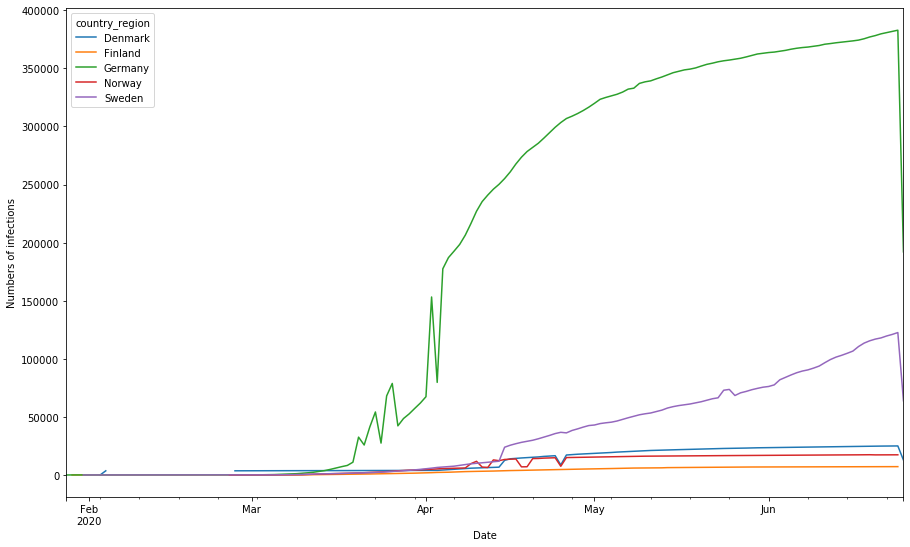

In [12]:
ax = scand.plot(figsize=(15,9))
ax.set_xlabel('Date')
ax.set_ylabel('Numbers of infections')
plt.show()

We can see that the number of infections in Germany is way higher than in the scandinavian countries and Sweden and Denmark are worst cases of the scandinavian countries (ignoring Iceland). **However what happens if we look at relative numbers associating the number of new infections to the total population?**
- Germany: 83 Mio
- Denmark: 5.8 Mio
- Finland: 5.5 Mio
- Norway: 5.4 Mio
- Sweden: 10 Mio

All numbers taken from Wikipedia.

In [13]:
scand['Germany'] = scand['Germany']/83e+6
scand['Denmark'] = scand['Denmark']/5.8e+6
scand['Finland'] = scand['Finland']/5.5e+6
scand['Norway'] = scand['Norway']/5.4e+6
scand['Sweden'] = scand['Sweden']/10e+6

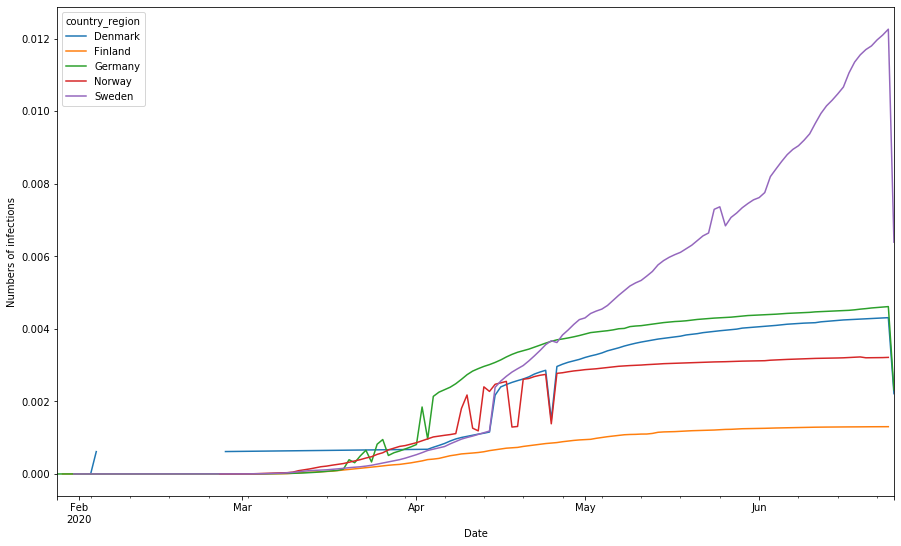

In [14]:
ax = scand.plot(figsize=(15,9))
ax.set_xlabel('Date')
ax.set_ylabel('Numbers of infections')
plt.show()

In this case, Sweden looks worse than any of the other countries whereas the impacts on Germany and Denmark are very close.

## Question: If we only look at Germany, how is the distribution of infections between the different regions?

In [15]:
ger = data[data['country_region']=='Germany']
set(ger['admin_region_1'].values)

{'Baden-Württemberg',
 'Bavaria',
 'Berlin',
 'Brandenburg',
 'Bremen',
 'Hamburg',
 'Hesse',
 'Lower Saxony',
 'Mecklenburg-West Pomerania',
 'North Rhine-Westphalia',
 'Rhineland-Palatinate',
 'Saarland',
 'Saxony',
 'Saxony-Anhalt',
 'Schleswig-Holstein',
 'Thuringia',
 nan}

We see that the distribution is made according to their states. So let's take a look at the data.

In [16]:
ger_sum = ger.groupby(['updated', 'admin_region_1'])[['confirmed']].sum().unstack()['confirmed']
ger_sum

admin_region_1,Baden-Württemberg,Bavaria,Berlin,Brandenburg,Bremen,Hamburg,Hesse,Lower Saxony,Mecklenburg-West Pomerania,North Rhine-Westphalia,Rhineland-Palatinate,Saarland,Saxony,Saxony-Anhalt,Schleswig-Holstein,Thuringia
updated,,,,,,,,,,,,,,,,
2020-03-20,3807.0,3650.0,1024.0,274.0,165.0,872.0,1175.0,1306.0,172.0,3545.0,1053.0,187.0,606.0,211.0,347.0,216.0
2020-03-21,3809.0,4271.0,1050.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-22,3811.0,4892.0,1077.0,288.0,170.0,943.0,1347.0,1483.0,195.0,5615.0,1177.0,200.0,653.0,212.0,383.0,249.0
2020-03-23,6069.0,6558.0,1428.0,429.0,200.0,1262.0,1754.0,2140.0,218.0,7197.0,1591.0,403.0,959.0,375.0,577.0,394.0
2020-03-25,7283.0,7993.0,1656.0,477.0,211.0,1265.0,2157.0,2347.0,244.0,7924.0,1816.0,433.0,1141.0,418.0,675.0,468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-20,35272.0,47827.0,7733.0,3383.0,1636.0,5160.0,10556.0,13136.0,791.0,40372.0,6903.0,2776.0,5408.0,1839.0,3133.0,3210.0
2020-06-21,35303.0,47843.0,7804.0,3388.0,1645.0,5163.0,10575.0,13209.0,792.0,40921.0,6907.0,2778.0,5415.0,1842.0,3134.0,3214.0
2020-06-22,35334.0,47867.0,7833.0,3394.0,1648.0,5170.0,10578.0,13283.0,792.0,41218.0,6917.0,2785.0,5422.0,1844.0,3136.0,3221.0


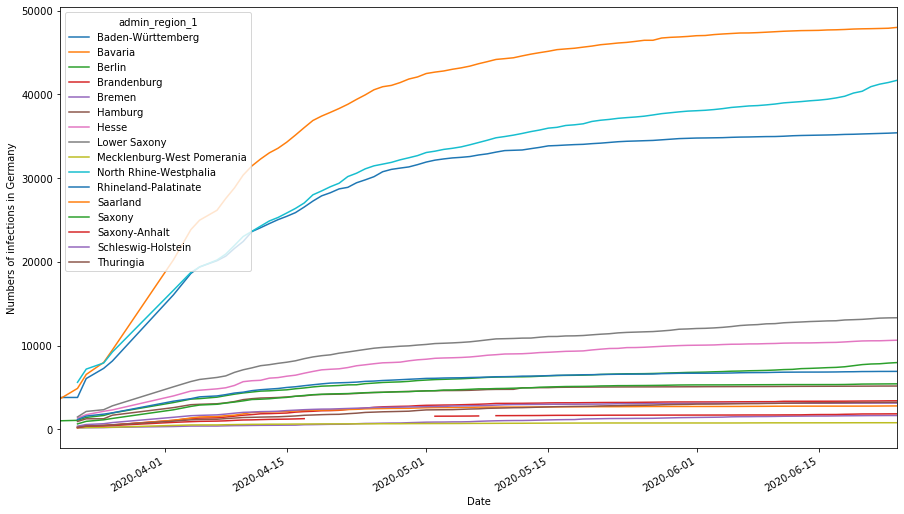

In [17]:
ax = ger_sum.plot(figsize=(15,9))
ax.set_xlabel('Date')
ax.set_ylabel('Numbers of infections in Germany')
plt.show()

As we can see, the 3 most affected regions are:
- Bavaria
- Baden Württemberg
- North Rhine-Westphalia

These are the 2 most southern regions and therefore nearest to Italy where the epidemic broke out first in Europe and the most densely populated state.

## Question: What about the Countries with more then 100 million inhabitants?

- Bangladesh, 168 Mio
- Brazil, 211 Mio
- China, 1400 Mio
- Egypt, 100 Mio
- India, 1300 Mio
- Indonesia, 269 Mio
- Japan, 125 Mio
- Mexico, 127 Mio
- Nigeria, 206 Mio
- Pakistan, 220 Mio
- Phillipines, 108 Mio
- Russia, 140 Mio
- USA, 330 Mio

In [18]:
data3 = data[(data['country_region']=='Bangladesh') | (data['country_region']=='Brazil') | (data['country_region']=='China (mainland)') | (data['country_region']=='Egypt') | (data['country_region']=='India') | (data['country_region']=='Indonesia') | (data['country_region']=='Japan') | (data['country_region']=='Mexico') | (data['country_region']=='Nigeria') | (data['country_region']=='Pakistan') | (data['country_region']=='Philippines') | (data['country_region']=='Russia') | (data['country_region']=='United States')]
data3

,id,updated,confirmed,confirmed_change,deaths,deaths_change,recovered,recovered_change,latitude,longitude,iso2,iso3,country_region,admin_region_1,iso_subdivision,admin_region_2
4621,7166803,2020-03-08,3,NaN,0.0,NaN,0.0,NaN,23.80488,90.27921,BD,BGD,Bangladesh,NaN,NaN,NaN
4622,341719,2020-03-09,3,0.0,0.0,0.0,NaN,NaN,23.80488,90.27921,BD,BGD,Bangladesh,NaN,NaN,NaN
4623,341720,2020-03-10,3,0.0,0.0,0.0,NaN,NaN,23.80488,90.27921,BD,BGD,Bangladesh,NaN,NaN,NaN
4624,341721,2020-03-11,3,0.0,0.0,0.0,NaN,NaN,23.80488,90.27921,BD,BGD,Bangladesh,NaN,NaN,NaN
4625,341722,2020-03-12,3,0.0,0.0,0.0,NaN,NaN,23.80488,90.27921,BD,BGD,Bangladesh,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379750,33187688,2020-06-20,1,0.0,0.0,0.0,1.0,0.0,43.84049,-104.56790,US,USA,United States,Wyoming,US-WY,Weston County
379751,33774434,2020-06-21,1,0.0,0.0,0.0,1.0,0.0,43.84049,-104.56790,US,USA,United States,Wyoming,US-WY,Weston County
379752,34402008,2020-06-22,1,0.0,0.0,0.0,1.0,0.0,43.84049,-104.56790,US,USA,United States,Wyoming,US-WY,Weston County
379753,34935629,2020-06-23,1,0.0,0.0,0.0,1.0,0.0,43.84049,-104.56790,US,USA,United States,Wyoming,US-WY,Weston County


In [19]:
hundreds = data3.groupby(['updated', 'country_region'])[['confirmed']].sum().unstack()['confirmed']
hundreds

country_region,Bangladesh,Brazil,China (mainland),Egypt,India,Indonesia,Japan,Mexico,Nigeria,Pakistan,Philippines,Russia,United States
updated,,,,,,,,,,,,,
2020-01-21,NaN,NaN,440.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0
2020-01-22,NaN,NaN,571.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,830.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
2020-01-24,NaN,NaN,1287.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0
2020-01-25,NaN,NaN,1975.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-21,112306.0,2152617.0,166761.0,55233.0,1155755.0,89153.0,34049.0,346000.0,20244.0,350390.0,30052.0,1110526.0,6478409.0
2020-06-22,115786.0,2212940.0,166795.0,56809.0,1196335.0,90107.0,33998.0,350577.0,20919.0,360043.0,30682.0,1122050.0,6554893.0
2020-06-23,119198.0,2291812.0,166831.0,58141.0,1231996.0,91158.0,34102.0,356865.0,21371.0,367858.0,31825.0,1139325.0,6648181.0


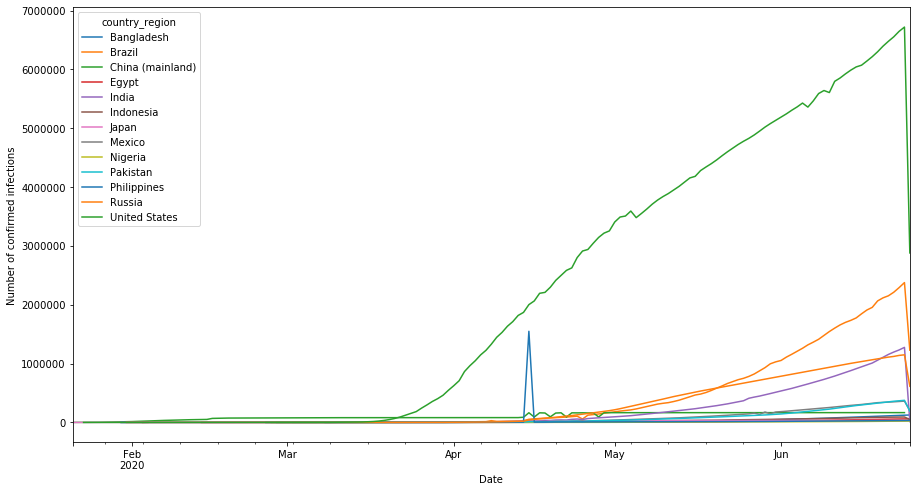

In [20]:
ax = hundreds.plot(figsize=(15,8))
ax.set_xlabel('Date')
ax.set_ylabel('Number of confirmed infections')
plt.show()

Interestingly, the USA outperforms every other country including China. This might be due to
- weaknesses in health care system
- non sufficient precautions
- density of people depending on the location.

## Therefore question: How is the distribution of infections in the USA among its geographical locations?

In [21]:
usa = data[data['country_region']=='United States']
set(usa['admin_region_1'].values)

{'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming',
 nan}

We can compare each state. However maybe we should also include the population density of each state.

In [22]:
usastates = usa.groupby(['updated', 'admin_region_1'])[['confirmed']].sum().unstack()['confirmed']
usastates

admin_region_1,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
updated,,,,,,,,,,,,,,,,,,,,,
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-01-30,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-21,51150.0,1065.0,94789.0,30605.0,346365.0,57719.0,89934.0,15685.0,10020.0,194475.0,...,11137.0,62460.0,222134.0,22514.0,1817.0,100984.0,55657.0,3340.0,49641.0,1886.0
2020-06-22,51894.0,1072.0,99049.0,31582.0,355554.0,57973.0,89999.0,15789.0,10058.0,200359.0,...,11186.0,63094.0,229290.0,23175.0,1823.0,101716.0,56671.0,3362.0,50148.0,1932.0
2020-06-23,52761.0,1078.0,104906.0,32679.0,367838.0,58230.0,90145.0,15874.0,10094.0,206891.0,...,11200.0,63904.0,239970.0,23718.0,1960.0,103391.0,57714.0,3383.0,50670.0,1961.0


In [23]:
usastates['New York']

updated
2020-01-21         0.0
2020-01-24         0.0
2020-01-25         0.0
2020-01-26         0.0
2020-01-30         0.0
                ...   
2020-06-21    775728.0
2020-06-22    776873.0
2020-06-23    778045.0
2020-06-24    779367.0
2020-06-25         NaN
Name: New York, Length: 130, dtype: float64

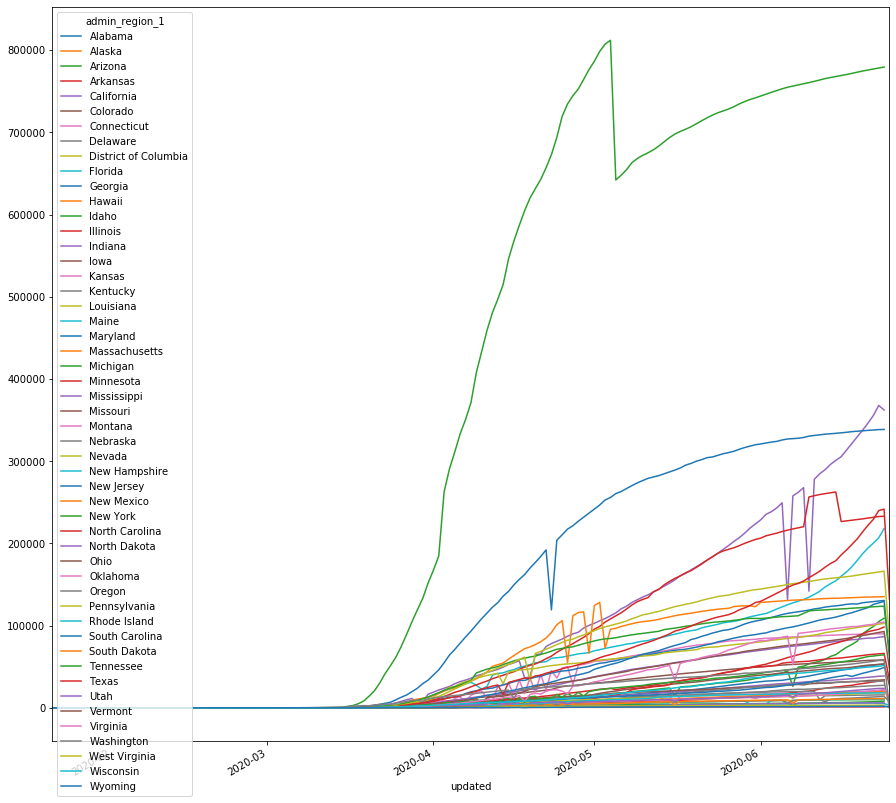

In [24]:
usastates.plot(figsize=(15,15))
plt.show()

That is too much at once, so what if we take the states with the highest numbers of infections?. Furthermore, we can see that New York includes more than half of all infections and is not even the most populated state. But first, we have to fill every nan value at the last row. if it is nan then fill with the last confirmed value. **Or** we simply take the day before.

In [25]:
last_day = pd.Series(usastates.iloc[-2], index=usastates.columns)
last_day.sort_values(ascending=False, inplace=True)
last_day[:6]

admin_region_1
New York      779367.0
California    362223.0
New Jersey    338609.0
Texas         241708.0
Illinois      233019.0
Florida       217898.0
Name: 2020-06-24 00:00:00, dtype: float64

In [26]:
usa_high = pd.DataFrame({'New York': usastates['New York'].values,
                         'New Jersey': usastates['New Jersey'].values,
                         'California': usastates['California'].values,
                         'Illinois': usastates['Illinois'].values,
                         'Florida': usastates['Florida'].values,
                         'Texas': usastates['Texas'].values}, index=usastates.index)
usa_high.head(3)

,New York,New Jersey,California,Illinois,Florida,Texas
updated,,,,,,
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,1.0,0.0,0.0
2020-01-25,0.0,0.0,1.0,1.0,0.0,0.0


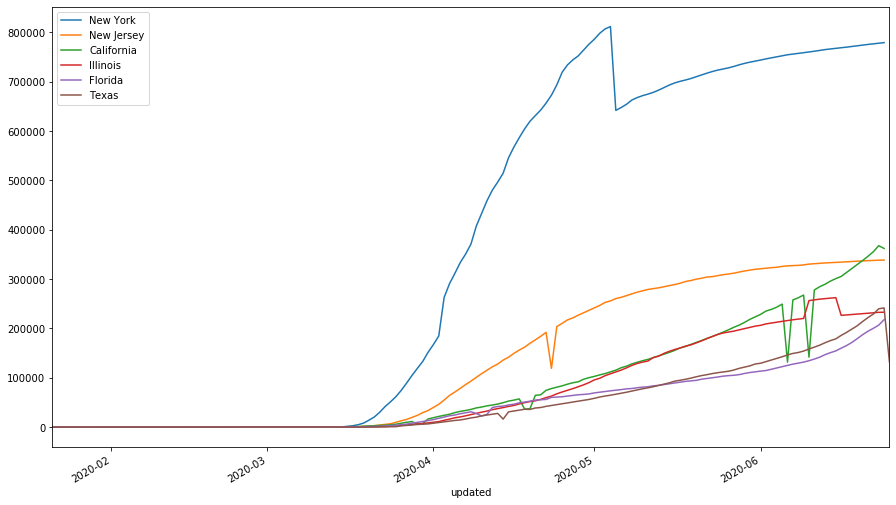

In [27]:
usa_high.plot(figsize=(15,9))
plt.show()

Pattern:
- 4 states are among the top 5 most populated ones
- All states have densely populated cities
- All states belong to the top 15 of states with highest population

### What about the states with the lowest number infections?

In [28]:
last_day.iloc[-6:]

admin_region_1
West Virginia    3385.0
Wyoming          1996.0
Vermont          1903.0
Montana          1303.0
Hawaii           1261.0
Alaska           1078.0
Name: 2020-06-24 00:00:00, dtype: float64

- None of theses states have more than 2 million inhabitants
- Alaska, Vermont and Wymoning have less than 1 million inhabitants
- Hawaii is an island, Alaska is not connected to the rest of the USA
- None of these states have high populated cities